## Step 1: Load the Dataset

In [3]:
import pandas as pd

df=pd.read_csv("retail_sales_dataset.csv")
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


## Step 2: Explore the Dataset

In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


## Step 3: Handle Missing Values
We will check for missing values and handle them appropriately.

In [5]:
# Check missing values
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [6]:
# Fill missing numerical values with mean
df.fillna(df.mean(numeric_only=True), inplace=True)

## Step 4: Normalize Numerical Features

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,0.000000,2023-11-24,CUST001,Male,0.347826,Beauty,0.666667,0.052632,0.063291
1,0.001001,2023-02-27,CUST002,Female,0.173913,Clothing,0.333333,1.000000,0.493671
2,0.002002,2023-01-13,CUST003,Male,0.695652,Electronics,0.000000,0.010526,0.002532
3,0.003003,2023-05-21,CUST004,Male,0.413043,Clothing,0.000000,1.000000,0.240506
4,0.004004,2023-05-06,CUST005,Male,0.260870,Beauty,0.333333,0.052632,0.037975


## Step 5: Histograms

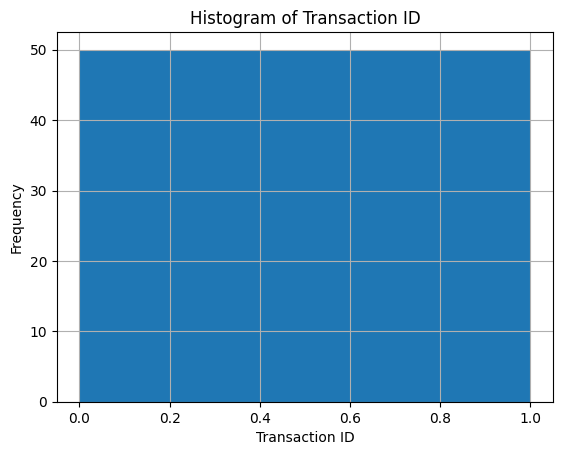

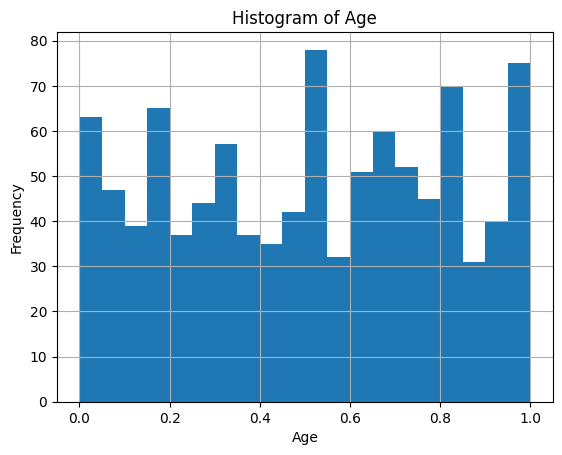

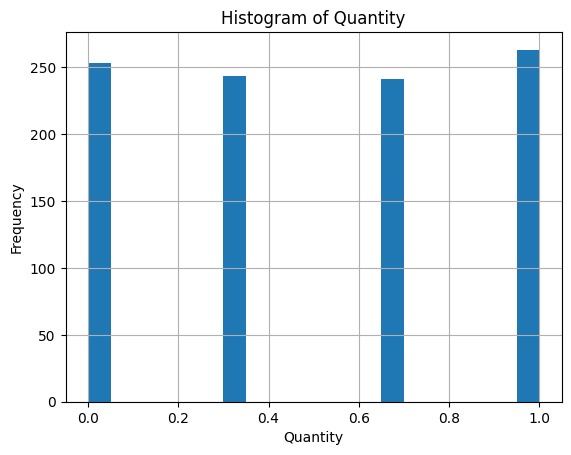

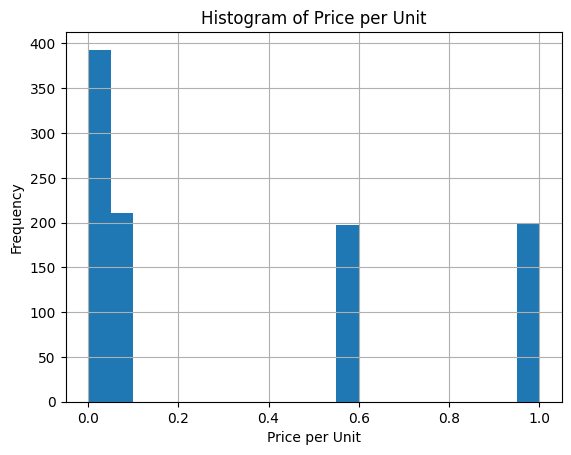

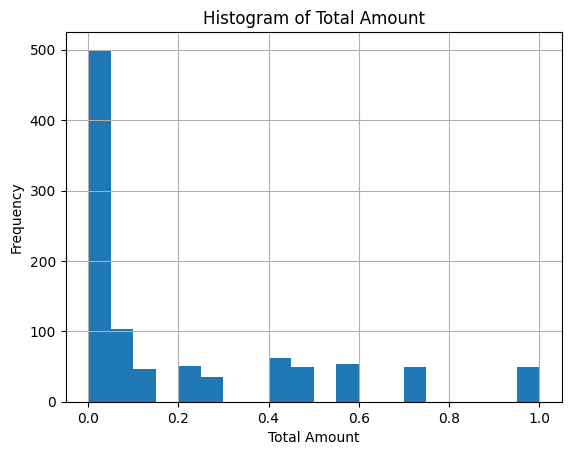

In [8]:
import matplotlib.pyplot as plt

for col in numerical_cols:
    plt.figure()
    df[col].hist(bins=20)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

## Step 6: Boxplots

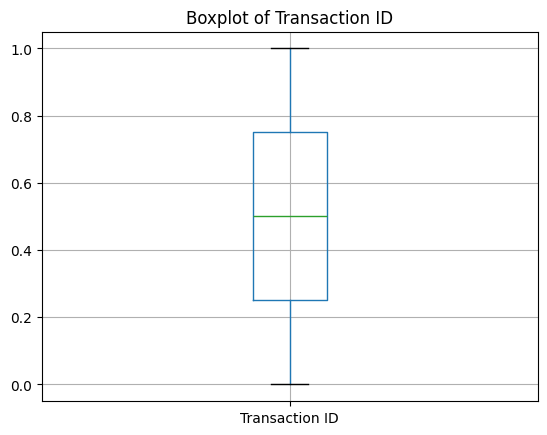

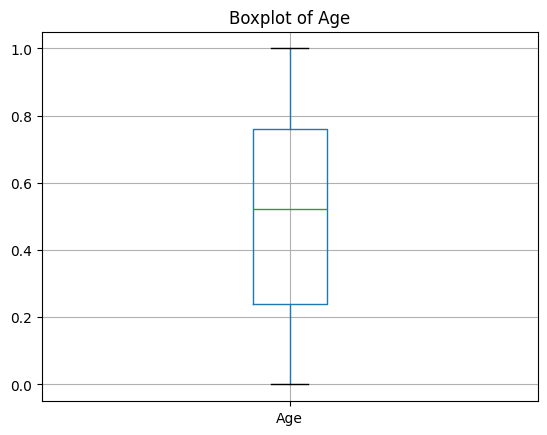

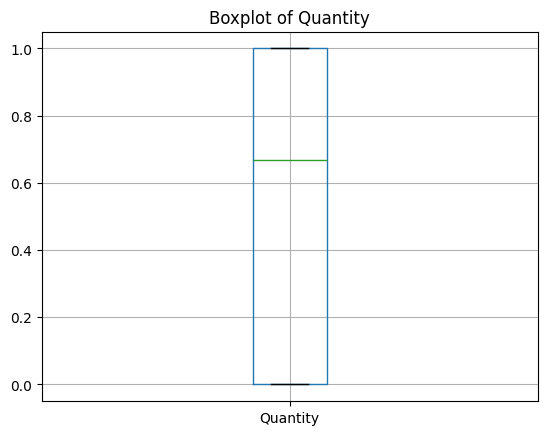

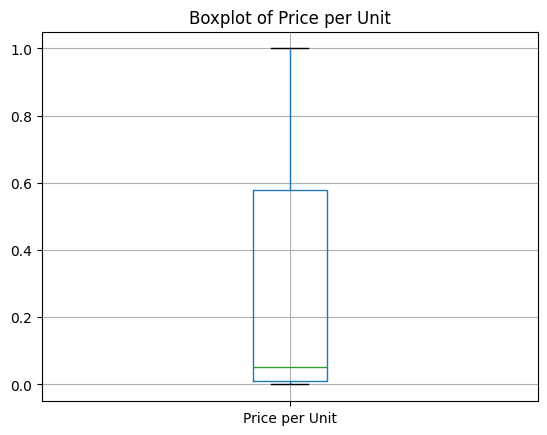

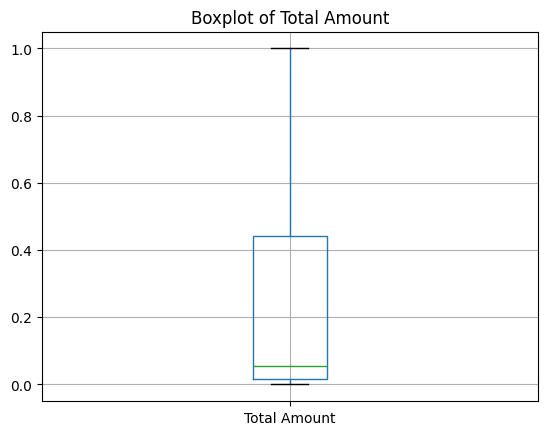

In [9]:
for col in numerical_cols:
    plt.figure()
    df.boxplot(column=col)
    plt.title(f'Boxplot of {col}')
    plt.show()

## Step 7: Correlation Matrix

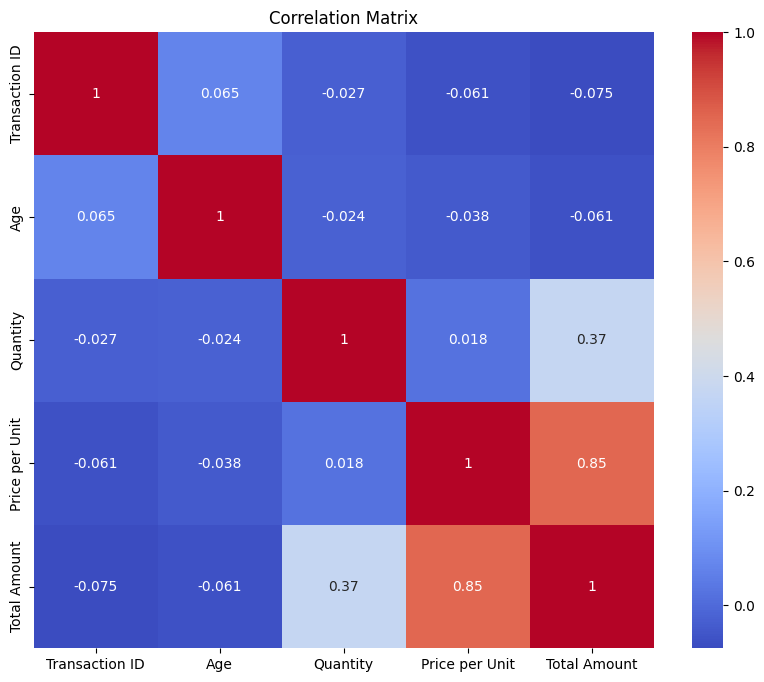

In [10]:
import seaborn as sns

corr = df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Step 8: Explore Seasonal Patterns
Assuming the dataset contains a `date` and `sales` column.

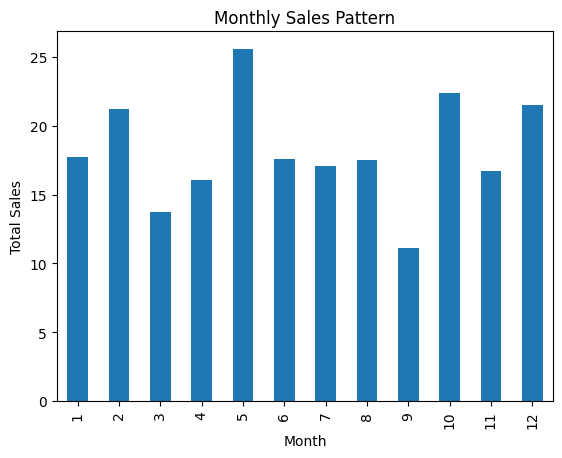

In [11]:
# Convert date column to datetime and extract month
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['month'] = df['Date'].dt.month

# Group by month and visualize
monthly_sales = df.groupby('month')['Total Amount'].sum()

monthly_sales.plot(kind='bar')
plt.title('Monthly Sales Pattern')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

Retailers can expect high demand in May, suggesting the need to stock up inventory and possibly launch promotions.

Low demand in September indicates an opportunity for targeted marketing campaigns to boost sales during that period.

Since Age has minimal impact, marketing strategies should focus more on time/seasonality rather than customer demographics like age.